In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from bioinfokit.analys import stat
import researchpy as rp
import numpy as np
import datetime
import fiona
from shapely.geometry import Point, Polygon, MultiPolygon

In [2]:
def read_data(path):
    return pd.read_csv(path)

In [3]:
file_path = "./datasets/Motor_Vehicle_Collisions_-_Vehicles.csv"
data = read_data(file_path)

/home/milica/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3347: DtypeWarning: Columns (8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### Shape of dataset

In [4]:
data.shape

(3523329, 25)

In [5]:
data.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,10385780,100201,09/07/2012,9:03,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
2,14887647,3307608,10/02/2015,17:18,2,NY,TAXI,NaN,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN
3,14889754,3308693,10/04/2015,20:34,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
4,14400270,297666,04/25/2013,21:15,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Vehicular,NaN


In [6]:
data['CRASH_DATE'] = pd.to_datetime(data['CRASH_DATE'])
df = data.loc[(data['CRASH_DATE'] >= datetime.datetime(2014, 9, 13)) & (data['CRASH_DATE'] <= datetime.datetime(2019, 11, 24))] 

In [7]:
df.shape

(2333912, 25)

In [8]:
df.dtypes

UNIQUE_ID                               int64
COLLISION_ID                            int64
CRASH_DATE                     datetime64[ns]
CRASH_TIME                             object
VEHICLE_ID                             object
STATE_REGISTRATION                     object
VEHICLE_TYPE                           object
VEHICLE_MAKE                           object
VEHICLE_MODEL                          object
VEHICLE_YEAR                          float64
TRAVEL_DIRECTION                       object
VEHICLE_OCCUPANTS                      object
DRIVER_SEX                             object
DRIVER_LICENSE_STATUS                  object
DRIVER_LICENSE_JURISDICTION            object
PRE_CRASH                              object
POINT_OF_IMPACT                        object
VEHICLE_DAMAGE                         object
VEHICLE_DAMAGE_1                       object
VEHICLE_DAMAGE_2                       object
VEHICLE_DAMAGE_3                       object
PUBLIC_PROPERTY_DAMAGE            

In [9]:
pd.set_option('display.max_columns', None)
df.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
2,14887647,3307608,2015-10-02,17:18,2,NY,TAXI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN
3,14889754,3308693,2015-10-04,20:34,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
5,17044639,3434155,2016-05-02,17:35,219456,NY,4 dr sedan,MERZ -CAR/SUV,NaN,2015.0,East,2.0,M,Licensed,FL,Merging,Right Front Bumper,Right Front Bumper,Right Front Quarter Panel,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unsafe Lane Changing
6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,2006.0,East,13.0,M,Licensed,NY,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified


### Columns with null values

In [10]:
def cols_with_null(df):
    sum_nan = df.isnull().sum().to_frame()
    sum_nan.columns=['#NaN']
    sum_nan_thresh = sum_nan[sum_nan['#NaN'] > 0]
    pd.set_option('display.max_rows', None)
    print(sum_nan_thresh)

In [11]:
cols_with_null(df)

                                #NaN
STATE_REGISTRATION            137996
VEHICLE_TYPE                  119925
VEHICLE_MAKE                  812126
VEHICLE_MODEL                2282539
VEHICLE_YEAR                  818251
TRAVEL_DIRECTION              713120
VEHICLE_OCCUPANTS             769035
DRIVER_SEX                    999982
DRIVER_LICENSE_STATUS        1051418
DRIVER_LICENSE_JURISDICTION  1041729
PRE_CRASH                     111627
POINT_OF_IMPACT               733093
VEHICLE_DAMAGE                743989
VEHICLE_DAMAGE_1             1340199
VEHICLE_DAMAGE_2             1601285
VEHICLE_DAMAGE_3             1776086
PUBLIC_PROPERTY_DAMAGE        641125
PUBLIC_PROPERTY_DAMAGE_TYPE  2320944
CONTRIBUTING_FACTOR_1          79961
CONTRIBUTING_FACTOR_2         725715


In [12]:
def rows_nan(df):
    sum_nan_by_row = df.isnull().sum(axis=1).to_frame()
    sum_nan_by_row.columns=['#NaN']
    # sum_nan_thresh = sum_nan[sum_nan['#NaN'] > 0]
    pd.set_option('display.max_rows', 30)
    print(sum_nan_by_row)
    return sum_nan_by_row

In [13]:
temp = rows_nan(df)


         #NaN
1           5
2          16
3          16
5           4
6           5
...       ...
3521635     5
3521881     5
3522004     3
3522068     3
3522105     2

[2333912 rows x 1 columns]


In [14]:
np.max(temp)

#NaN    20
dtype: int64

### Removing missing values

In [18]:
columns_to_remove = ['VEHICLE_MODEL', 'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PUBLIC_PROPERTY_DAMAGE_TYPE']
df = df.drop(columns= columns_to_remove)

In [19]:
cols_with_null(df)

                           #NaN
STATE_REGISTRATION       137996
VEHICLE_TYPE             119925
VEHICLE_MAKE             812126
VEHICLE_YEAR             818251
TRAVEL_DIRECTION         713120
VEHICLE_OCCUPANTS        769035
DRIVER_SEX               999982
PRE_CRASH                111627
POINT_OF_IMPACT          733093
VEHICLE_DAMAGE           743989
VEHICLE_DAMAGE_1        1340199
VEHICLE_DAMAGE_2        1601285
VEHICLE_DAMAGE_3        1776086
PUBLIC_PROPERTY_DAMAGE   641125
CONTRIBUTING_FACTOR_1     79961
CONTRIBUTING_FACTOR_2    725715


### Number of unique values by column

In [20]:
df_unique = df.nunique().to_frame()
df_unique.columns=['#Unique']
df_unique

,#Unique
UNIQUE_ID,2333912
COLLISION_ID,1162407
CRASH_DATE,1899
CRASH_TIME,1440
VEHICLE_ID,1692820
STATE_REGISTRATION,76
VEHICLE_TYPE,1429
VEHICLE_MAKE,8241
VEHICLE_YEAR,277
TRAVEL_DIRECTION,15


In [24]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
rp.summary_cat(df["DRIVER_SEX"])

,Variable,Outcome,Count,Percent
0,DRIVER_SEX,M,980559,73.51
1,,F,347157,26.03
2,,U,6214,0.47


In [25]:
rp.summary_cat(df["PUBLIC_PROPERTY_DAMAGE"])

,Variable,Outcome,Count,Percent
0,PUBLIC_PROPERTY_DAMAGE,N,1514124,89.45
1,,Unspecified,171247,10.12
2,,Y,7416,0.44


In [29]:
rp.summary_cat(df["PRE_CRASH"])

,Variable,Outcome,Count,Percent
0,PRE_CRASH,Going Straight Ahead,1075177,48.38
1,,Parked,349538,15.73
2,,Making Left Turn,135619,6.10
3,,Making Right Turn,117103,5.27
4,,Stopped in Traffic,109010,4.91
5,,Slowing or Stopping,87132,3.92
6,,Backing,83294,3.75
7,,Changing Lanes,71722,3.23
8,,Starting from Parking,40284,1.81
9,,Merging,39629,1.78


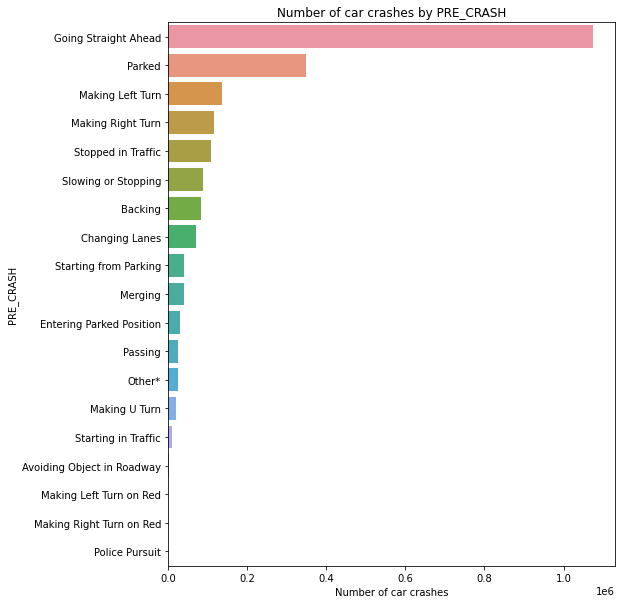

In [27]:
plt.figure(figsize = (8,10))
sns.countplot(y= 'PRE_CRASH', data = df, order = df['PRE_CRASH'].value_counts().index)
plt.ylabel('PRE_CRASH')
plt.xlabel('Number of car crashes')
plt.title('Number of car crashes by PRE_CRASH')
plt.show()

In [30]:
rp.summary_cat(df["POINT_OF_IMPACT"])

,Variable,Outcome,Count,Percent
0,POINT_OF_IMPACT,Center Front End,252172,15.75
1,,Left Front Bumper,198594,12.41
2,,Center Back End,194616,12.16
3,,Right Front Bumper,178178,11.13
4,,Right Front Quarter Panel,122176,7.63
5,,Left Front Quarter Panel,117119,7.32
6,,Left Rear Quarter Panel,93844,5.86
7,,Left Side Doors,85711,5.35
8,,Left Rear Bumper,84786,5.30
9,,Right Side Doors,74320,4.64


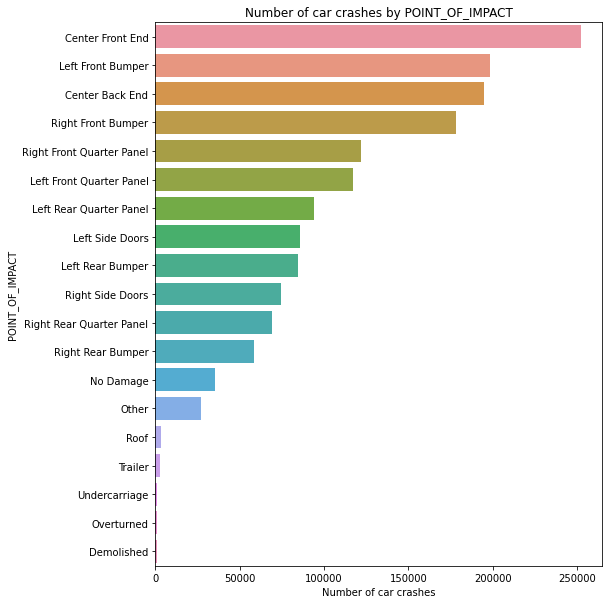

In [31]:
plt.figure(figsize = (8,10))
sns.countplot(y= 'POINT_OF_IMPACT', data = df, order = df['POINT_OF_IMPACT'].value_counts().index)
plt.ylabel('POINT_OF_IMPACT')
plt.xlabel('Number of car crashes')
plt.title('Number of car crashes by POINT_OF_IMPACT')
plt.show()

In [32]:
rp.summary_cat(df["VEHICLE_DAMAGE"])

,Variable,Outcome,Count,Percent
0,VEHICLE_DAMAGE,Center Front End,226677,14.26
1,,Center Back End,166270,10.46
2,,Left Front Bumper,165943,10.44
3,,Right Front Bumper,154703,9.73
4,,No Damage,147439,9.27
5,,Left Front Quarter Panel,114550,7.20
6,,Right Front Quarter Panel,113969,7.17
7,,Left Rear Quarter Panel,89778,5.65
8,,Left Side Doors,88358,5.56
9,,Left Rear Bumper,81514,5.13


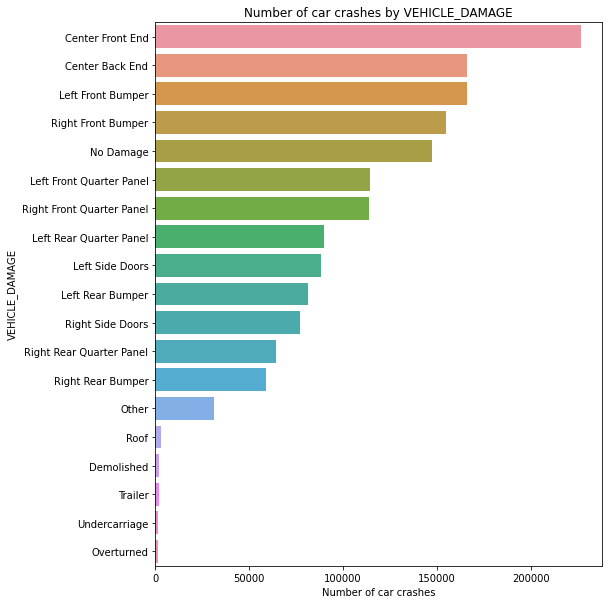

In [33]:
plt.figure(figsize = (8,10))
sns.countplot(y= 'VEHICLE_DAMAGE', data = df, order = df['VEHICLE_DAMAGE'].value_counts().index)
plt.ylabel('VEHICLE_DAMAGE')
plt.xlabel('Number of car crashes')
plt.title('Number of car crashes by VEHICLE_DAMAGE')
plt.show()

In [34]:
file_path = "./processed.csv"
temp = read_data(file_path)

/home/milica/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3347: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [36]:
d = temp[temp["INJURED"] > 0]
d.shape

(198863, 17)

In [37]:
d = temp[temp["KILLED"] > 0]
d.shape

(1057, 17)

In [38]:
temp.shape

(1026643, 17)